In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load Data
df = pd.read_csv(r"C:\Users\Pooja\Downloads\archive (18)\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [11]:
# Overview
print(df.info())
print(df['Attrition'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

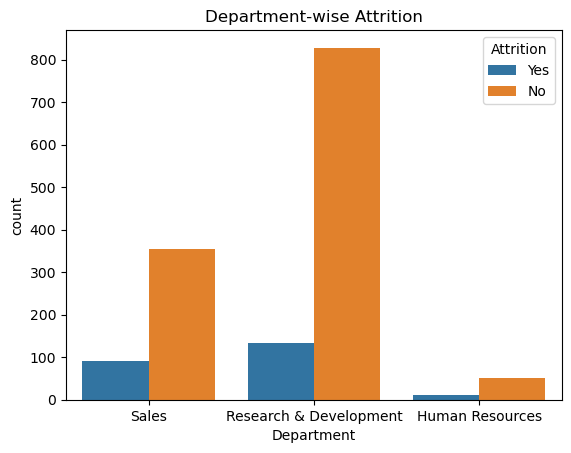

In [13]:
# Department-wise Attrition
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department-wise Attrition")
plt.show()

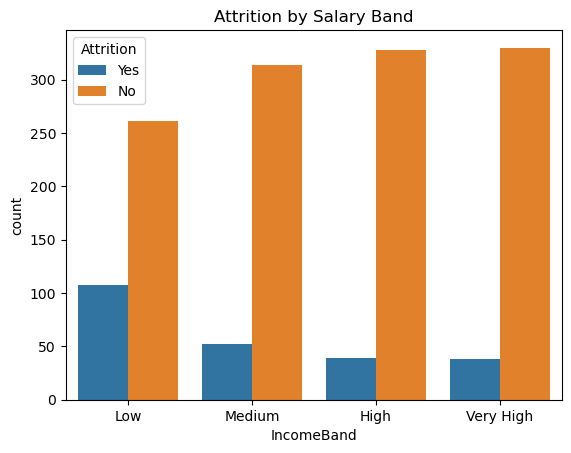

In [15]:
# Salary Bands (MonthlyIncome)
df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(x='IncomeBand', hue='Attrition', data=df)
plt.title("Attrition by Salary Band")
plt.show()

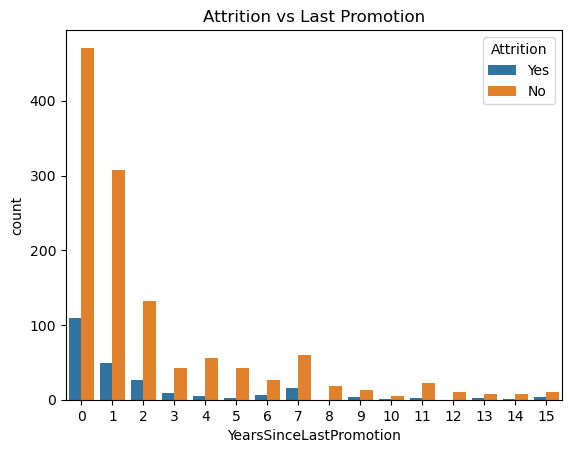

In [17]:
# Promotions
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df)
plt.title("Attrition vs Last Promotion")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7517006802721088
Confusion Matrix:
 [[209  46]
 [ 27  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       255
           1       0.21      0.31      0.25        39

    accuracy                           0.75       294
   macro avg       0.55      0.56      0.55       294
weighted avg       0.80      0.75      0.77       294



In [27]:
from sklearn.preprocessing import LabelEncoder

# Drop 'IncomeBand' if it exists (to avoid string values like 'Low', 'High', etc.)
if 'IncomeBand' in df.columns:
    df = df.drop(['IncomeBand'], axis=1)

# Encode all object (categorical) columns to numeric
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7517006802721088
Confusion Matrix:
 [[209  46]
 [ 27  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       255
           1       0.21      0.31      0.25        39

    accuracy                           0.75       294
   macro avg       0.55      0.56      0.55       294
weighted avg       0.80      0.75      0.77       294



In [33]:
!pip install shap


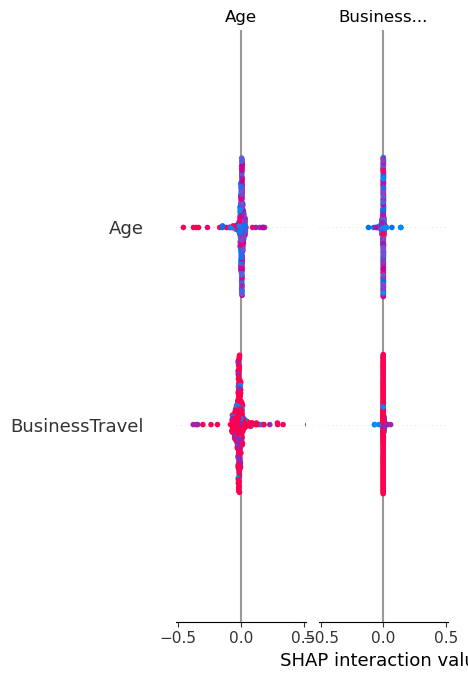

In [37]:
import shap

# Create explainer and calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# For DecisionTreeClassifier, shap_values is directly used
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [41]:
# Save cleaned data
df.to_csv("cleaned_hr_data.csv", index=False)

# Save predictions
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output_df.to_csv("model_predictions.csv", index=False)


In [43]:
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred


In [49]:
# Exporting to CSV
results_df.to_csv("model_predictions.csv", index=False)


In [51]:
import shutil

# Move it to a visible directory if needed
shutil.move("model_predictions.csv", "/mnt/data/model_predictions.csv")


FileNotFoundError: [WinError 3] The system cannot find the path specified